Matplotlib

In matplotlib, a plot consists of a figure and one or more axes. You can think of the figure as the blank canvas upon which one or more plots will be displayed: it is the entire plotting window. The axes contain important information about each plot, such as its x-axis and y-axis labels, title, and more. (Note that in matplotlib, the word axes is not the plural of axis: a plot's axes contains much more information than just the x-axis and the y-axis)

We begin by importing the subplots the subplots() function from matplotlib. We use this function throughout when creating figures. The function returns a tuple of length two: a figure object as well as the relevant axes object. We will typically pass figsize as a keyword argument. Having created our axes, we attempt our first plot using its plot() method. To learn more about it, type ax.plot?

In [22]:
ax.plot?

Signature: ax.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, 

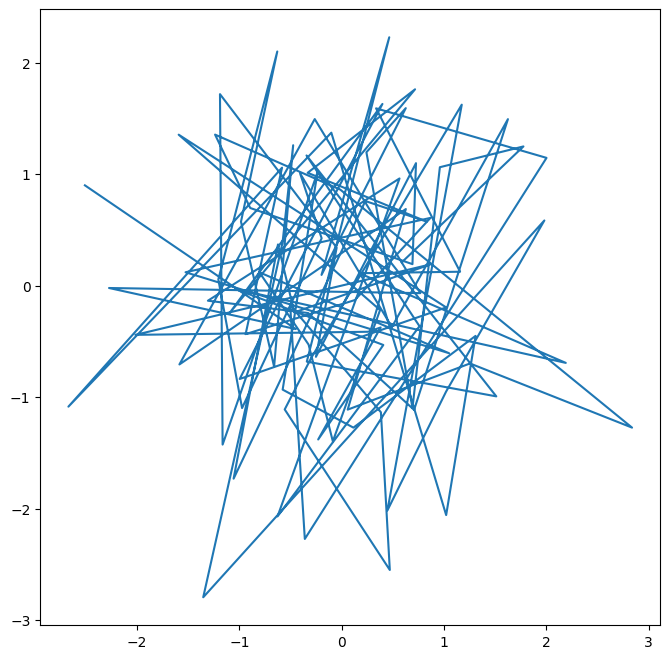

In [1]:
from matplotlib.pyplot import subplots
import numpy as np

rng = np.random.default_rng()

fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);

We pause here to note that we have unpacked the tuple of length two returned by subplots() into two distinct variables fig and ax. Unpacking is typically preferred to the following equivalent but slightly more verbose code:

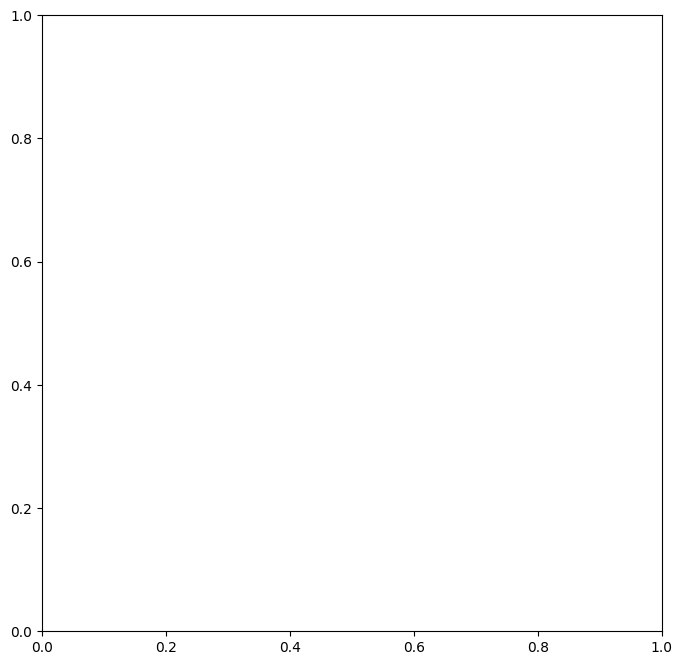

In [2]:
output = subplots(figsize=(8, 8))
fig = output[0]
ax = output[1];

We see that our earlier cell produced a line plot, which is the default. To create a scatterplot, we provide an addtional argument to ax.plot(), indicating that circles should be displayed.

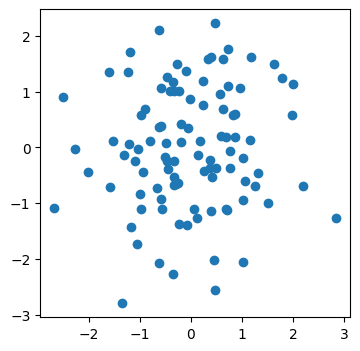

In [3]:
fig, ax = subplots(figsize=(4, 4))
ax.plot(x, y, 'o');

Different values of this addtional argument can be used to produce different colored lines as well as different linestyles.
As an alternative, we could use the ax.scatter() function to create a scatterplot.

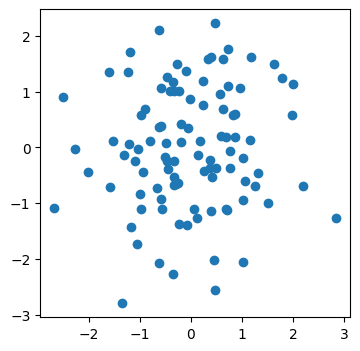

In [4]:
fig, ax = subplots(figsize=(4, 4))
ax.scatter(x, y, marker='o');

Notice that in the code blocks above, we have ended the last line with a semicolon. This prevents ax.plot(x, y) from printing text to the notebook. However, it does not prevent a plot from being produced. If we omit the trailing semi-colon, then we obtain the following output:

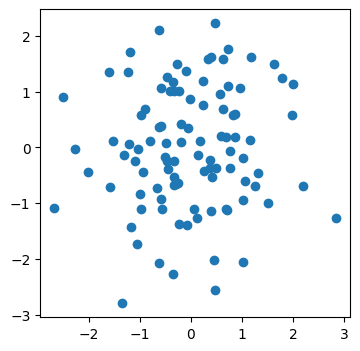

In [5]:
fig, ax = subplots(figsize=(4, 4))
ax.scatter(x, y, marker='o');

In what follows, we will use trailing semicolons whenever the text that would be output is not germane to the discussion at hand.
To label our plot, we make use of the set_xlabel(), set_ylabel(), and set_title() methods of ax.

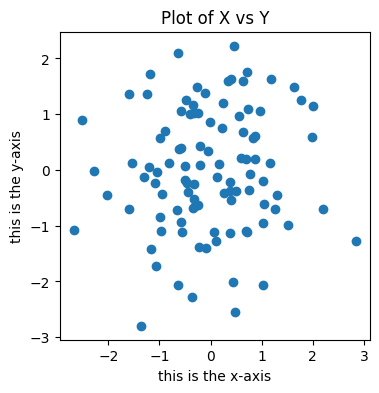

In [6]:
fig, ax = subplots(figsize=(4, 4))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

Having access to the figure object fig itself means that we can go in and change some aspects and then redisplay it. Here, we change the size from (4, 4) to (12, 3)

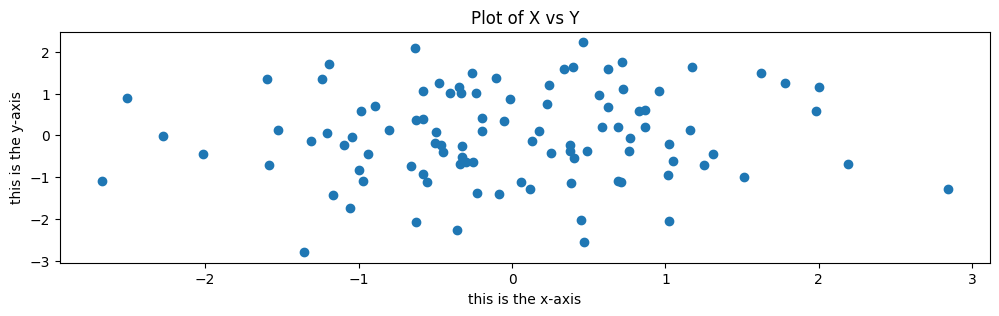

In [7]:
fig.set_size_inches(12, 3)
fig

Occasionally we will want to create several plots within a figure. This can be achieved by passing addtional arguments to subplots(). Below, we create a
2 x 3 grid of plots in a figure of size determined by the figzize argument. In such situations, all plots may have a common x-axis. The subplots() fucntion can automatically handle this situation when passed the keyword argument sharex=true. The axes object below is an array pointing to different plots in the figure.

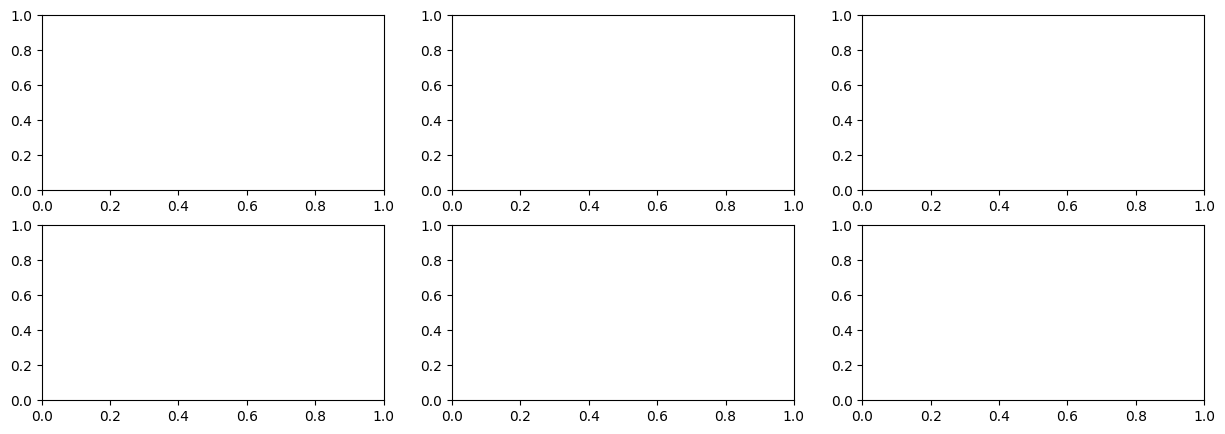

In [8]:
fig, axes = subplots(nrows=2,
                     ncols=3,
                     figsize=(15, 5))

We now produce a scatter plot with 'o' in the second column of the first row and a scatter plot with '+' in the third column of the second row.

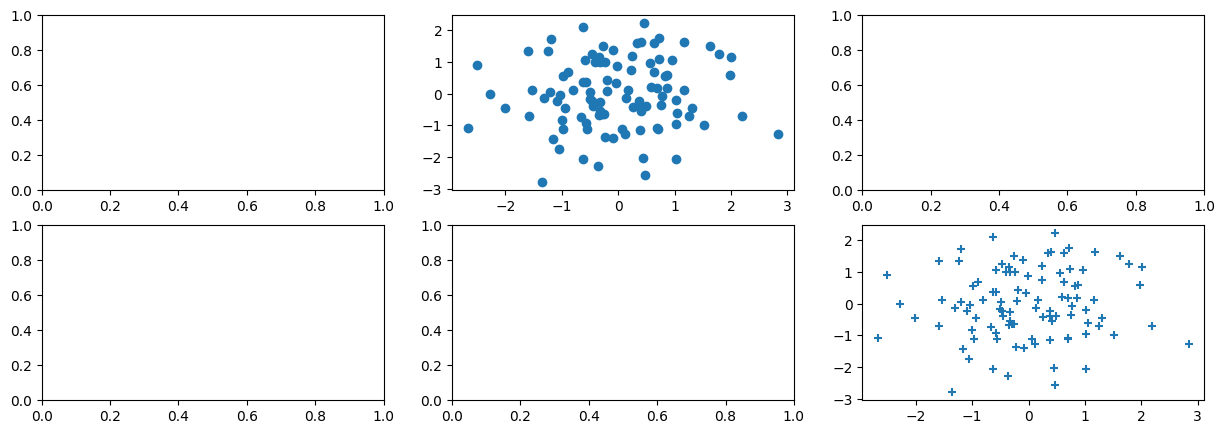

In [9]:
axes[0, 1].plot(x, y, 'o')
axes[1, 2].scatter(x, y, marker='+')
fig

In [10]:
subplots?

Signature:
subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 

To save the output of fig, we call its savefig() method. The argument dpi is the dots per inch, used to determine how large the figure will be in pixels.

In [11]:
fig.savefig("Figure.png", dpi=400)
fig.savefig("Figure.pdf", dpi=200);

We can continue to modify fig using step-by-step updates; for example, we can modify the range of the x-axis, re-save the figure, and even re-display it

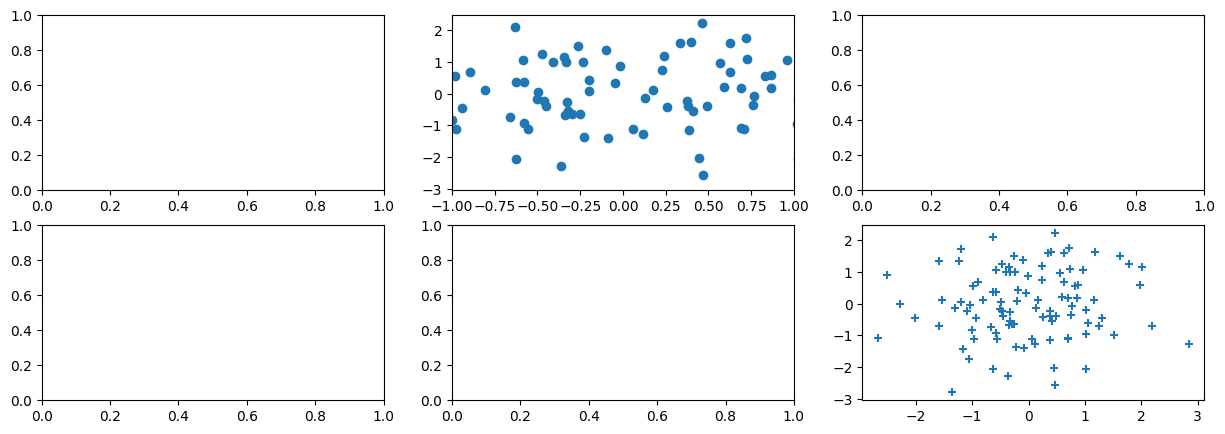

In [12]:
axes[0, 1].set_xlim([-1, 1])
fig.savefig("Figure.jpg")
fig

We now create some more sophisticated plots. The ax.contour() method produces a contour plot in order to represent three-dimensional data, similar to a topographical map. It takes three arguments:
    
    - A vector of x values (the first dimension)

    - A vector of y values (the second dimension), and

    - A matrix whose elements correspond to the z value (the third dimension) for each pair of (x, y) coordinates.

To create x and y, we'll use the command np.linespace(a, b, n), which returns a vector of n numbers starting at a and ending at b.

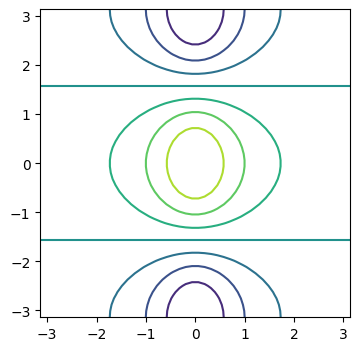

In [13]:
fig, ax = subplots(figsize=(4, 4))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x ** 2))
ax.contour(x, y, f);

We can increase the resolution by adding more levels to the image.

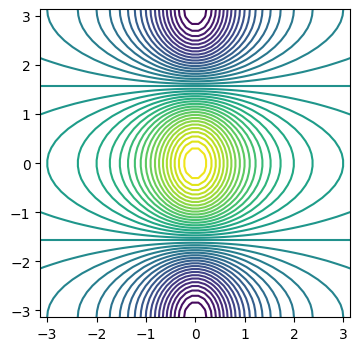

In [14]:
fig, ax = subplots(figsize=(4, 4))
ax.contour(x, y, f, levels=45);

To fine-tune the output of the ax.contour() function, take a look at the help file by typing ?plt.contour.
The ax.imshow() method is similar to ax.contour(), except that it produces a color-coded plot whose colors depend on the z value. This is known as a heatmap, and is sometimes used to plot temperature in weather forecasts.

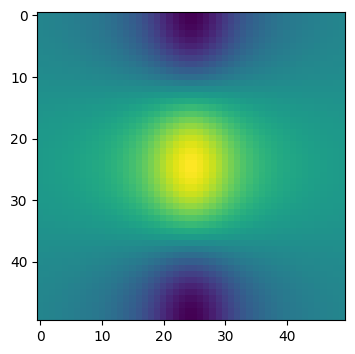

In [15]:
fig, ax = subplots(figsize=(4, 4))
ax.imshow(f);

Sequences and Slice Notation

As seen above, the function np.linspace() can be used to create a sequence of numbers.

In [16]:
seq1 = np.linspace(0, 10, 11)
seq1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

The function np.arange() returns a sequence of numbers spaced out by step. If step is not specified, the a default value of 1 is used. Let's create a sequence that starts at 0 and ends at 10.

In [17]:
seq2 = np.arange(0, 10)
seq2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Why isn't 10 output above? This has to do with slice notation in Python. Slice notation is used to index sequences such as lists, tuples, and arrays. Suppose we want to retrive the fourth through sixth(inclusive) entries of a string. We obtain a slice of the string using indexing notation [3:6].

In [18]:
"hello world"[3:6]

'lo '

In the code block above, the notation 3:6 is short hand for slice(3, 6) when usen inside [].

In [19]:
"hello world"[slice(3, 6)]

'lo '

You might have expected slice(3, 6) to output the fourth through seventh characters in the text string (recalling that Python begins its indexing at zero), but instead it output the fourth through sixth. This also explains why the earlier np.arange(0, 10) command output only the integers from 0 to 9.

Indexing Data

To begin, we create a two-dimesional numpy array.

In [20]:
A = np.array(np.arange(16)).reshape((4, 4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Typing A[1, 2] retrives the element corresponding to the second row and third column.

In [21]:
A[1, 2]

np.int64(6)

The first number after the open-bracket symbol [ refers to the row, and the second number refers to the column.

Indexing Rows, Columns, and Submatrices

To select multiple rows at a time, we can pass in a list specifying our selection. For insatance, [1, 3] will retrieve the second and fourth rows:

In [23]:
A[[1, 3]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

To select the first and third columns, we pass in [0, 2] as the second argument in the square brackets. In this case we need to supply the first argument: which select all rows.

In [24]:
A[:,[0, 2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

Now, suppose that we want to select the submatrix made up of the second and fourth rows as well as the first and third columns. This is where indexing. It is natural to try to use lists to retrieve the rows and columns:

In [25]:
A[[1, 3], [0, 2]]

array([ 4, 14])

Oops! What happened? We get a one-dimensional array of length two indetical to

In [26]:
np.array([A[1, 0], A[3, 2]])

array([ 4, 14])

Similarly, the following code fails to extract the submatrix comprised of the second and fourth rows and the first, third, and fourth columns:

In [ ]:
#A[[1, 3], [0, 2, 3]]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

We can see what has gone wrong here. When supplied with two indexing lists, the numpy interpretation is that these provide pairs of i, j indeces for a series of entries. That is why the pair of lists must have the same length.
However, that was now our intent, since we are looking for a submatrix.
One easy way to do this is as follows. We first create a submatrix by subsetting the rows of A, and then on the fly we make a further submatrix by subsetting its columns.

In [28]:
A[[1, 3]][:,[0, 2]]

array([[ 4,  6],
       [12, 14]])

There are more effcient ways of achieving the same result.
The convenience function np.ix_() allows us to extract a submatrix using lists, by creating an intermediate mesh object.

In [29]:
idx = np.ix_([1, 3], [0, 2, 3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

Alternatively, we can subset matrices efficiently using slices. The slice 1:4:2 captures the second and fourth items of a sequence, while the slice 0:3:2 captures the first and third items(the third element in a slice sequence is the step size).

In [30]:
A[1:4:2, 0:3:2]

array([[ 4,  6],
       [12, 14]])

Why are we able to retrive a submatrix directly using slices but not using lists: Its because they are different Python types, and are treated differently by numpy. Slices can be used to extract objects from arbitrary sequences, such as strings, lists, and tuples, while the use of lists for indexing is more limited.

Boolean Indexing

In numpy, a Boolean is a type that equals either True or False(also represented as 1 and 0, respectively). The next line creates a vector of 0's, represent as Booleans, of length equal to the first dimension of A.

In [31]:
keep_rows = np.zeros(A.shape[0], bool)
keep_rows

array([False, False, False, False])

We now set two of the elements to True.

In [32]:
keep_rows[[1, 3]] = True
keep_rows

array([False,  True, False,  True])

Note that the elements of keep_rows, when viewed as integers, are the same as the values of np.array([0, 1, 0, 1]). Below, we use == to verify their equality. When applied to two arrays, the == operation is applied elementwise.

In [33]:
np.all(keep_rows == np.array([0, 1, 0, 1]))

np.True_

(Here, the function np.all() has checked whether all entries of an array are True. A similar function, np.array(), can be used to check whether any entries of an array are True.)
However, even though np.array([0, 1, 0, 1]) and keep_rows are equal according to ==, they index different sets of rows! The former retrieves the first, second, first, and second rows of A.

In [34]:
A[np.array([0, 1, 0, 1])]

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

By contrast, keep_rows retrieves only the second and fourth rows of A i.e. the rows for which the Boolean equal TRUE.

In [35]:
A[keep_rows]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

This example shows that Booleans and integers are treated differently by numpy.
We again make use of the np.ix_() function to create a mesh containing the second and fourth rows, and the first, third, and fourth columns. This time, we apply the function to Booleans, rather than lists.

In [36]:
keep_cols = np.zeros(A.shape[1], bool)
keep_cols[[0, 2, 3]] = True
idx_bool = np.ix_(keep_rows, keep_cols)
A[idx_bool]

array([[ 4,  6,  7],
       [12, 14, 15]])

We can also mix a list with an array of Booleans in the arguments to np.ix_():

In [37]:
idx_mixed = np.ix_([1, 3], keep_cols)
A[idx_mixed]

array([[ 4,  6,  7],
       [12, 14, 15]])